###  This was my first project that I created in python, so your going to find some long codes that could be simplifyed, however you'll find a complete analysis and if you are learning python and statistics this project will be very good for your improvement. 

The main conclusion is that this model can be improved by using Machine Learning, but before going to that place it is better to understand the main statistical concepts.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
import seaborn as sns
from sklearn.linear_model import LinearRegression as reg
from sklearn.linear_model import LogisticRegression as logreg
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p

In [4]:
train1 = pd.read_csv("Resources/train1.csv")
test1 = pd.read_csv("Resources/test1.csv")

train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#train1.info()
train1.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
#Before deciding what to do with the information: 
#First we have to see some charts in order to undestand the data with the aim of finding insights


 mu = 10516.83 and sigma = 9977.85



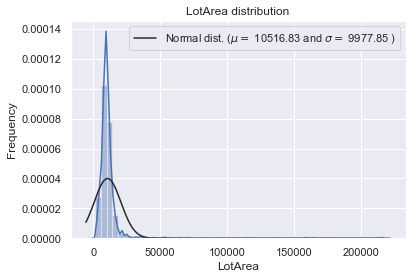

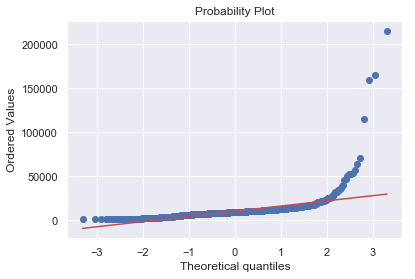

In [552]:
sns.distplot(train1['LotArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train1['LotArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('LotArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train1['LotArea'], plot=plt)
plt.show()


 mu = 9.11 and sigma = 0.52



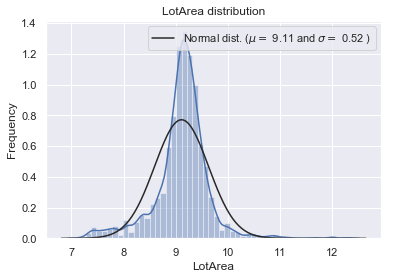

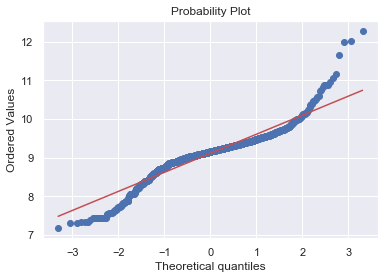

In [553]:
lnarea =np.log1p(train1["LotArea"])

#Check the new distribution 
sns.distplot(lnarea , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(lnarea)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('LotArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(lnarea, plot=plt)
plt.show()


 mu = 180921.20 and sigma = 79415.29



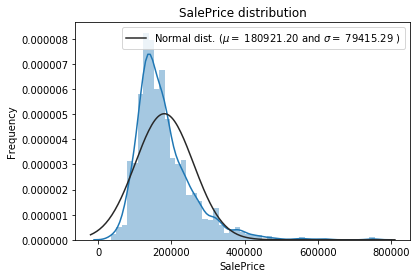

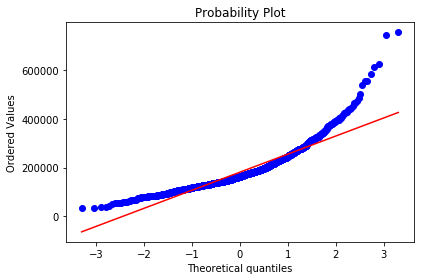

In [11]:
sns.distplot(train1['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train1['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train1['SalePrice'], plot=plt)
#plt.show()
plt.tight_layout()


 mu = 12.02 and sigma = 0.40



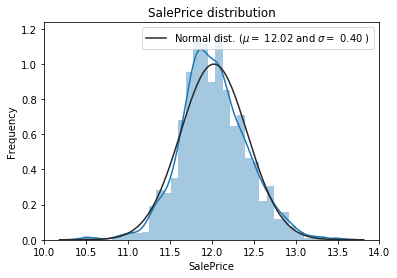

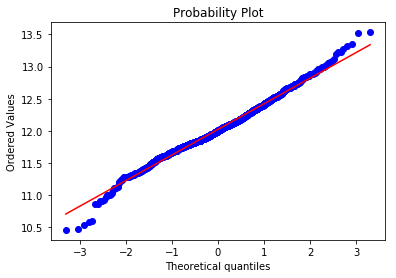

In [80]:
lnsaleprice = np.log1p(train1["SalePrice"])

#Check the new distribution 
fig1 = sns.distplot(lnsaleprice , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(lnsaleprice)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(lnsaleprice, plot=plt)
#plt.show()
#plt.tight_layout()
#plt.savefig('LN Sale Price Normal Distribution')


 mu = 1515.46 and sigma = 525.30



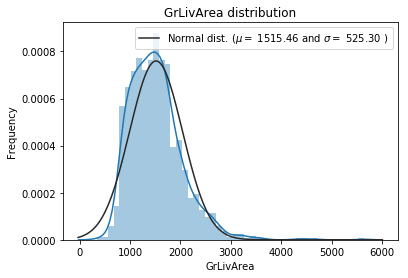

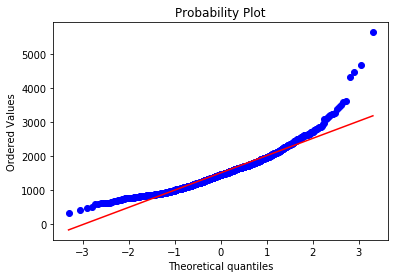

In [13]:
sns.distplot(train1['GrLivArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train1['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train1['GrLivArea'], plot=plt)
plt.show()


 mu = 7.27 and sigma = 0.33



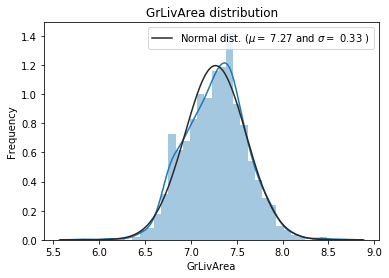

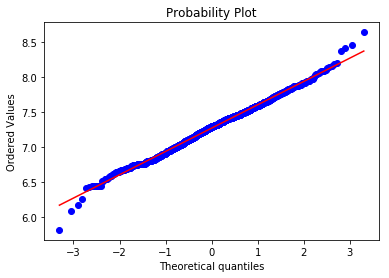

In [83]:
lngrlivarea = np.log1p(train1["GrLivArea"])

#Check the new distribution 
sns.distplot(lngrlivarea , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(lngrlivarea)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GrLivArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(lngrlivarea, plot=plt)
plt.show()

### At first sight, this data can be organized as a logarithm model. However, we have to take in consideration that we cannot do that with dummy variables.
One approach can be normalize the data, however due to time frame period of the project, the approach followed will be calculate logarithm of sales and most of the numerical variables

In [6]:
# We can also see the stats of the data to see mean, std and max and min. this information is useful to find segments or outliers
# Due the short extend of this project we won't remove outliers. 
display(train1.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1222.0,68.846154,25.740071,0.0,58.00,68.5,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


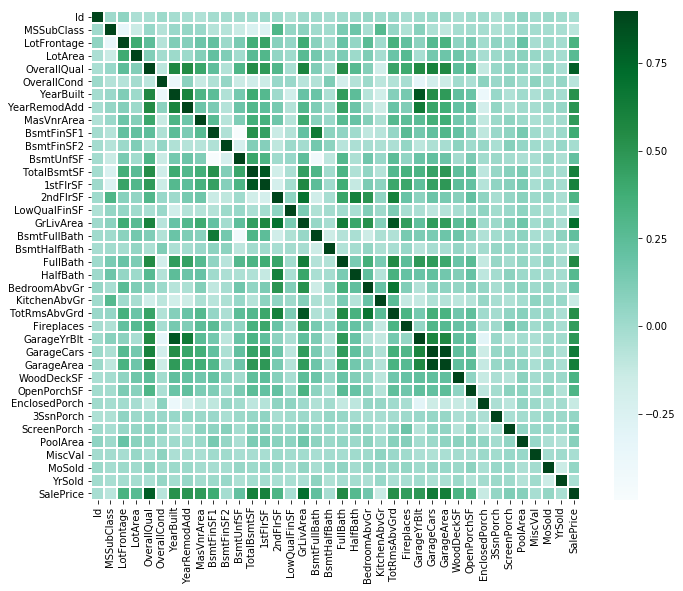

In [8]:
# We can also see a correlation map.
corrmat = train1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, cmap='BuGn', linecolor='white',linewidths=1,vmax=0.9, square=True, annot=False)

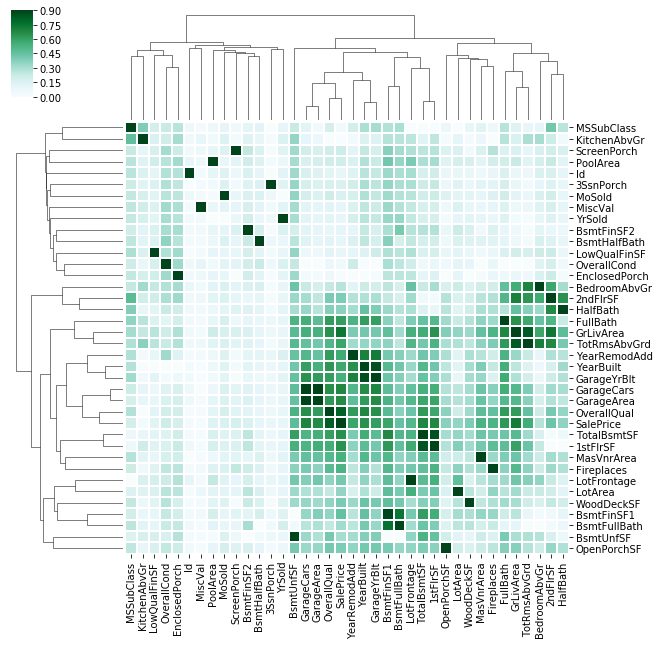

In [10]:
sns.clustermap(corrmat,cmap='BuGn',standard_scale=1 ,linewidths=1,vmax=0.9, linecolor='white', annot=False).savefig('cluster.png')

In [9]:
#now we can see and try to explore the data: at first we saw the data in excel, then we tried to replicate the adjustements in python
train1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Now we going to transform the data in a way we can run regressions because this database has many information that is not useful
We run some analysis in Minitab and Excel in order to work faster comparing this data cleaning with the following steps that we going following here in this Python code and we need to transform the data to work with numerical variable, categorical variables, which includes ordinal variables 

In [11]:
# Transforming the DB: we have to adjust the DB in order to run the regression model
# First working with categorical variables and then with ordinal (a subset of categorical's)
train1['Street'].head(5)
pd.get_dummies(train1['Street']).head()

,Grvl,Pave
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [12]:
# Then to avoid multicolineality: this technique will be applied to the following variables that we are going to work
pave = pd.get_dummies(train1['Street'],drop_first = True)
pave.head()

,Pave
0,1
1,1
2,1
3,1
4,1


In [13]:
# We running this code in order to what is the name of the categorical data. This process will be showed once due to the extent of the code 
train1['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [15]:
# Here we do the same as the previous step, however we wrote the code in one line 
condition2_adj = pd.get_dummies(train1['Condition2'],drop_first = True)
condition2_adj.head()

,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [16]:
pd.get_dummies(train1['SaleCondition']).head()
condition = pd.get_dummies(train1['SaleCondition'],drop_first = True)
condition.head()

,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,1,0


In [17]:
pd.get_dummies(train1['BldgType']).head()
building_type = pd.get_dummies(train1['BldgType'],drop_first = True)
building_type.head()

,2fmCon,Duplex,Twnhs,TwnhsE
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [18]:
pd.get_dummies(train1['MSZoning']).head()
zoning = pd.get_dummies(train1['MSZoning'],drop_first = True)
zoning.head()

,FV,RH,RL,RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [22]:
# We are going to continue adjusting the data for each case needed and at the end, we will add the new columns and drop the columns that won't be needed in our model
train1['YearBuilt'].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

In [23]:
# Then we transform the data to obtain the numbers of years the house selected has
yearbuilt_adj = 2019 - train1["YearBuilt"]
yearbuilt_adj.head()

0     16
1     43
2     18
3    104
4     19
Name: YearBuilt, dtype: int64

In [24]:
# Then we create the dataframe in order to be used later to create our new train1 database. This procedure was repeated with remodalation year variable
Year_Old = pd.DataFrame(yearbuilt_adj)
Year_Old.rename(columns={"YearBuilt":"YearBuilt_Adj"}, inplace=True)
Year_Old.head()

,YearBuilt_Adj
0,16
1,43
2,18
3,104
4,19


In [25]:
train1['YearRemodAdd'].head()

year_remodel = 2019 - train1["YearRemodAdd"]
Year_Remodel = pd.DataFrame(year_remodel)

Year_Remodel.rename(columns={"YearRemodAdd":"YearRemodAdd_Adj"}, inplace=True)
Year_Remodel.head()

,YearRemodAdd_Adj
0,16
1,43
2,17
3,49
4,19


In [26]:
# now we are going to calculate the number of bathrooms in the house.
total_bathroom = train1["BsmtFullBath"] + train1["BsmtHalfBath"] + train1["FullBath"]+ train1["HalfBath"]
total_bathroom.head()

0    4
1    3
2    4
3    2
4    4
dtype: int64

In [27]:
# then we going to create the dataframe
Total_Bathroom = pd.DataFrame(total_bathroom)
Total_Bathroom.rename(columns={0:"Total_Bath"}, inplace= True)
Total_Bathroom.head()

,Total_Bath
0,4
1,3
2,4
3,2
4,4


In [28]:
# Now we are going to calculate the number of floors this house has
train1["1stFlrSF"].head()

0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64

In [29]:
# We basically we will use the area as an indicator, then if the value is 0 means you dont have a floor if is 1 is because your area is greater than 0 and in consequence you have a floor
# for do that we create a loop
f1st = []
for x in train1["1stFlrSF"]:
    if x > 0:
        f1st.append(1)
    else:
        f1st.append(0)
len(f1st)

1460

In [30]:
# Then we create the dataframe because later we going to add to variables in order to obtain the number of floors we have in the house
f_1st = pd.DataFrame(f1st)
f_1st.rename(columns={0:"1st_floor"}, inplace= True)
f_1st.head()

,1st_floor
0,1
1,1
2,1
3,1
4,1


In [31]:
# We did the same for the next floor
train1["2ndFlrSF"].head()

f2nd = []
for x in train1["2ndFlrSF"]:
    if x > 0:
        f2nd.append(1)
    else:
        f2nd.append(0)
len(f2nd)

1460

In [32]:
f_2nd = pd.DataFrame(f2nd)
f_2nd.rename(columns={0:"2nd_floor"}, inplace= True)
f_2nd.head()

,2nd_floor
0,1
1,0
2,1
3,1
4,1


In [33]:
# Now we can create the new variable total floor adding the two previous variables created
total_floor = f_1st['1st_floor'] + f_2nd['2nd_floor']
total_floor.head()

0    2
1    1
2    2
3    2
4    2
dtype: int64

In [34]:
t_floor = pd.DataFrame(total_floor)

t_floor.rename(columns={0:"total floor"}, inplace= True)
t_floor.head()

,total floor
0,2
1,1
2,2
3,2
4,2


In [35]:
# Now we are going to work in the adjustment of the ordinal data
train1['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [36]:
# we created a loop to change those names with numbers
kitqual = []
for x in train1["KitchenQual"]:
    if x == 'Ex':
        kitqual.append(5)
    elif x == 'Gd':
        kitqual.append(4)
    elif x == 'TA':
        kitqual.append(3)
    elif x == 'Fa':
        kitqual.append(2)
    else:
        kitqual.append(1)
#kitqual

In [37]:
kitchen_quality = pd.DataFrame(kitqual)
kitchen_quality.rename(columns={0:"kit_qual"}, inplace= True)
kitchen_quality.head()

,kit_qual
0,4
1,3
2,4
3,4
4,4


In [38]:
# we did at first the same tratment as the first categorical variables, however after running some tests we decided to run it as the previous step.
pd.get_dummies(train1['KitchenQual']).head()
kitchen_qual = pd.get_dummies(train1['KitchenQual'],drop_first = True)
kitchen_qual.head()

,Fa,Gd,TA
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [118]:
#pd.read_csv(f_2nd).head()

In [39]:
train1['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [40]:
heatqual = []
for x in train1["HeatingQC"]:
    if x == 'Ex':
        heatqual.append(5)
    elif x == 'Gd':
        heatqual.append(4)
    elif x == 'TA':
        heatqual.append(3)
    elif x == 'Fa':
        heatqual.append(2)
    else:
        heatqual.append(1)
#heatqual

In [41]:
heat_quality = pd.DataFrame(heatqual)
heat_quality.rename(columns={0:"heat_qual"}, inplace= True)
heat_quality.head()

,heat_qual
0,5
1,5
2,5
3,4
4,5


In [42]:
pd.get_dummies(train1['HeatingQC']).head()
heating_qual = pd.get_dummies(train1['HeatingQC'],drop_first = True)
heating_qual.head()

,Fa,Gd,Po,TA
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,0


In [43]:
train1['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [44]:
garcon = []
for x in train1["GarageCond"]:
    if x == 'Ex':
        garcon.append(6)
    elif x == 'Gd':
        garcon.append(5)
    elif x == 'TA':
        garcon.append(4)
    elif x == 'Fa':
        garcon.append(3)
    elif x == 'Po':
        garcon.append(2)
    else:
        garcon.append(1)
#garcon

In [45]:
garage_condition = pd.DataFrame(garcon)
garage_condition.rename(columns={0:"g_cond"}, inplace= True)
garage_condition.head()

,g_cond
0,4
1,4
2,4
3,4
4,4


In [46]:
pd.get_dummies(train1['GarageCond']).head()
garage_qond = pd.get_dummies(train1['GarageCond'],drop_first = True)
garage_qond.head()

,Fa,Gd,Po,TA
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


## List of new tables to add into original train 1 table
pave, condition2_adj, Year_Old, Year_Remodel, Total_Bathroom, t_floor, condition, building_type, zoning, kitchen_quality (ordinal), heat_quality (ordinal), garage_condition (ordinal)

### Now we add these tables created into our original train1 table and the rename it as train_adj

In [47]:
#Merging tables:
train_adj =  pd.concat([train1,pave, condition2_adj, Year_Old, Year_Remodel, Total_Bathroom, t_floor, condition, building_type, zoning, kitchen_quality, heat_quality, garage_condition],axis =1)
#train2 = pd.concat([train1,pave,condition2_adj],axis =1)
train_adj.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Duplex,Twnhs,TwnhsE,FV,RH,RL,RM,kit_qual,heat_qual,g_cond
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,1,0,4,5,4
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,1,0,3,5,4
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,4,5,4
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,4,4,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,4,5,4


In [48]:
# Now we can drop the columns that we don't need in order to simplify the csv file
train_adj.drop(['Street','Condition2', 'YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','1stFlrSF','2ndFlrSF','SaleCondition','BldgType','MSZoning','KitchenQual', 'HeatingQC', 'GarageCond'  ],axis =1,inplace = True)

In [49]:
train_adj.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Duplex,Twnhs,TwnhsE,FV,RH,RL,RM,kit_qual,heat_qual,g_cond
0,1,60,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,0,4,5,4
1,2,20,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,1,0,3,5,4
2,3,60,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,0,4,5,4
3,4,70,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,0,4,4,4
4,5,60,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,1,0,4,5,4


In [50]:
# To remove NaN in your rows: 
train_adj1 = train_adj.dropna(axis=0, how='all')
train_adj1.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Duplex,Twnhs,TwnhsE,FV,RH,RL,RM,kit_qual,heat_qual,g_cond
0,1,60,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,0,4,5,4
1,2,20,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,1,0,3,5,4
2,3,60,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,0,4,5,4
3,4,70,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,0,4,4,4
4,5,60,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,1,0,4,5,4


In [51]:
#Creating the final election results file_used to check in excel wether we missed something or not
train_adj.to_csv("train_adj.csv", index=False, header=True)

## Now we can run the regression model using Python: the values we constrated with the results obtained using Excel and Minitab

In [52]:
X = train_adj1[['LotArea','GrLivArea','TotalBsmtSF','YearBuilt_Adj', 'YearRemodAdd_Adj','Total_Bath','total floor','BedroomAbvGr',
                'GarageCars','Pave','OverallQual', 'OverallCond','2fmCon', 'Duplex', 'Twnhs','TwnhsE','FV', 'RH', 'RL', 'RM',
               'GarageCars', 'kit_qual', 'heat_qual', 'g_cond']].values
Y = train_adj1['SalePrice'].values
model =reg()
model.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
model.intercept_.round(3)

-91522.896

In [54]:
model.coef_.round(3)

array([ 4.7800000e-01,  6.1665000e+01,  9.6730000e+00, -3.0028100e+02,
        1.2554700e+02,  8.4566110e+03, -1.7903809e+04, -8.3802280e+03,
        7.5194830e+03,  8.6530650e+03,  1.6500935e+04,  5.4728820e+03,
       -5.7150720e+03, -2.3344848e+04, -2.3196740e+04, -1.7553717e+04,
        1.1081723e+04,  1.3111623e+04,  1.1661252e+04,  6.7122300e+03,
        7.5194830e+03,  1.4342880e+04,  1.2644530e+03, -7.0612660e+03])

In [55]:
import statsmodels.api as sm

X = train_adj1[['LotArea','GrLivArea','TotalBsmtSF','YearBuilt_Adj', 'YearRemodAdd_Adj','Total_Bath','total floor', 'BedroomAbvGr',
                'GarageCars','Pave','OverallQual', 'OverallCond','2fmCon', 'Duplex', 'Twnhs','TwnhsE','FV', 'RH', 'RL', 'RM',
               'GarageCars', 'kit_qual', 'heat_qual', 'g_cond']].values
y = train_adj1['SalePrice'].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:48:20   Log-Likelihood:                -17326.
No. Observations:                1460   AIC:                         3.470e+04
Df Residuals:                    1436   BIC:                         3.483e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.152e+04   2.04e+04     -4.477      0.0

## After ran this model, we saw that we have improvement opportunities to reduce the p values and increase the statistical signicance of the model

In [56]:
# For that reason we made the transformation that intuitibely saw at the beginning of the data analysis using normal distribution plot with histograms
SalePrice = train_adj1['SalePrice']
#SalePrice
LN_SalePrice = np.log(SalePrice)
LN_SalePrice.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [57]:
# We will do the same process we did at the beginning 
LNSalePrice = pd.DataFrame(LN_SalePrice)
LNSalePrice.rename(columns={'SalePrice':"LN_SalePrice"}, inplace= True)
LNSalePrice.head()

,LN_SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [58]:
LotArea = train_adj1['LotArea']
LN_LotArea = np.log(LotArea)
#LN_LotArea.head()
LNLotArea = pd.DataFrame(LN_LotArea)
LNLotArea.rename(columns={'LotArea':"LN_LotArea"}, inplace= True)
LNLotArea.head()

,LN_LotArea
0,9.041922
1,9.169518
2,9.328123
3,9.164296
4,9.565214


In [59]:
YearBuilt_Adj = train_adj1['YearBuilt_Adj']
LN_YearBuilt_Adj = np.log(YearBuilt_Adj)
#LN_YearBuilt_Adj.head()
LNYearBuilt_Adj = pd.DataFrame(LN_YearBuilt_Adj)
LNYearBuilt_Adj.rename(columns={'YearBuilt_Adj':"LN_YearBuilt_Adj"}, inplace= True)
LNYearBuilt_Adj.head()

,LN_YearBuilt_Adj
0,2.772589
1,3.761200
2,2.890372
3,4.644391
4,2.944439


In [60]:
YearRemod_Adj = train_adj1['YearRemodAdd_Adj']
#YearBuilt_Adj
LN_YearRemod_Adj = np.log(YearRemod_Adj)
#LN_YearRemod_Adj.head()
LNYearRemod_Adj = pd.DataFrame(LN_YearRemod_Adj)
LNYearRemod_Adj.rename(columns={'YearRemodAdd_Adj':"LN_YearRemodAdd_Adj"}, inplace= True)
LNYearRemod_Adj.head()

,LN_YearRemodAdd_Adj
0,2.772589
1,3.761200
2,2.833213
3,3.891820
4,2.944439


In [61]:
TotalBath = train_adj1['Total_Bath']
#TotalBath
LN_TotalBath = np.log(TotalBath)
#LN_TotalBath.head()
LNTotalBath = pd.DataFrame(LN_TotalBath)
LNTotalBath.rename(columns={'Total_Bath':"LN_Total_Bath"}, inplace= True)
LNTotalBath.head()

,LN_Total_Bath
0,1.386294
1,1.098612
2,1.386294
3,0.693147
4,1.386294


In [62]:
TotalFloor = train_adj1['total floor']
#TotalBath
LN_TotalFloor = np.log(TotalFloor)
#LN_TotalFloor.head()
LNTotalFloor = pd.DataFrame(LN_TotalFloor)
LNTotalFloor.rename(columns={'total floor':"LN_total floor"}, inplace= True)
LNTotalFloor.head()

,LN_total floor
0,0.693147
1,0.000000
2,0.693147
3,0.693147
4,0.693147


In [63]:
GrLivArea = train_adj1['GrLivArea']
#LotArea
LN_GrLivArea = np.log(GrLivArea)
#LN_GrLivArea.head()
LNGrLivArea = pd.DataFrame(LN_GrLivArea)
LNGrLivArea.rename(columns={'GrLivArea':"LN_GrLivArea"}, inplace= True)
LNGrLivArea.head()

,LN_GrLivArea
0,7.444249
1,7.140453
2,7.487734
3,7.448334
4,7.695303


## Now We have to add the new calculated columns in order to run the regression using lN.
### Merging tables:

In [64]:

train_adj2 =  pd.concat([train_adj1,LNSalePrice, LNLotArea, LNGrLivArea, LNYearBuilt_Adj, LN_YearRemod_Adj, LNTotalBath, LNTotalFloor],axis =1)
train_adj2.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,kit_qual,heat_qual,g_cond,LN_SalePrice,LN_LotArea,LN_GrLivArea,LN_YearBuilt_Adj,YearRemodAdd_Adj,LN_Total_Bath,LN_total floor
0,1,60,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,4,5,4,12.247694,9.041922,7.444249,2.772589,2.772589,1.386294,0.693147
1,2,20,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,3,5,4,12.109011,9.169518,7.140453,3.761200,3.761200,1.098612,0.000000
2,3,60,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,4,5,4,12.317167,9.328123,7.487734,2.890372,2.833213,1.386294,0.693147
3,4,70,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,4,4,4,11.849398,9.164296,7.448334,4.644391,3.891820,0.693147,0.693147
4,5,60,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,4,5,4,12.429216,9.565214,7.695303,2.944439,2.944439,1.386294,0.693147


In [65]:
#Creating the final election results file
train_adj2.to_csv("train_adj2.csv", index=False, header=True)

In [66]:
train_adj2 = train_adj2.dropna(axis=0, how='all')
train_adj2.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,kit_qual,heat_qual,g_cond,LN_SalePrice,LN_LotArea,LN_GrLivArea,LN_YearBuilt_Adj,YearRemodAdd_Adj,LN_Total_Bath,LN_total floor
0,1,60,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,4,5,4,12.247694,9.041922,7.444249,2.772589,2.772589,1.386294,0.693147
1,2,20,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,3,5,4,12.109011,9.169518,7.140453,3.761200,3.761200,1.098612,0.000000
2,3,60,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,4,5,4,12.317167,9.328123,7.487734,2.890372,2.833213,1.386294,0.693147
3,4,70,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,4,4,4,11.849398,9.164296,7.448334,4.644391,3.891820,0.693147,0.693147
4,5,60,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,4,5,4,12.429216,9.565214,7.695303,2.944439,2.944439,1.386294,0.693147


In [67]:
train_adj2.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SalePrice', 'Pave', 'Feedr', 'No

In [68]:
# Now we can run the regression model again and see how are the values compared with the previous version of the model
X = train_adj2[['LN_LotArea', 'LN_GrLivArea', 'LN_YearBuilt_Adj', 'LN_Total_Bath', 'LN_total floor', 'BedroomAbvGr',
                'OverallQual', 'OverallCond','2fmCon', 'Duplex', 'Twnhs','TwnhsE','FV', 'RH', 'RL', 'RM',
               'GarageCars', 'kit_qual', 'heat_qual', 'g_cond']].values
Y = train_adj2['LN_SalePrice'].values
model_LN =reg()
model_LN.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
model_LN.intercept_

6.575509445542611

In [70]:
model_LN.coef_

array([ 0.09326494,  0.49137435, -0.09680746,  0.11341395, -0.16107032,
       -0.01919492,  0.07394381,  0.05090814, -0.03937112, -0.11057375,
       -0.01242706,  0.01197472,  0.36524908,  0.35927258,  0.35645737,
        0.29255456,  0.05105574,  0.03652494,  0.01203305,  0.01235784])

In [71]:
import statsmodels.api as sm

X = train_adj2[['LN_LotArea', 'LN_GrLivArea', 'LN_YearBuilt_Adj', 'LN_Total_Bath', 'LN_total floor', 'BedroomAbvGr',
                'OverallQual', 'OverallCond','2fmCon', 'Duplex', 'Twnhs','TwnhsE','FV', 'RH', 'RL', 'RM',
               'GarageCars', 'kit_qual', 'heat_qual', 'g_cond']].values
y = train_adj2['LN_SalePrice'].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     537.8
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:50:11   Log-Likelihood:                 828.71
No. Observations:                1460   AIC:                            -1615.
Df Residuals:                    1439   BIC:                            -1504.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5755      0.154     42.802      0.0

In [72]:
pd.options.display.float_format = '{:,.3f}'.format
coefvalues= [6.575509445542611,0.09326494,  0.49137435, -0.09680746,  0.11341395, -0.16107032,
       -0.01919492,  0.07394381,  0.05090814, -0.03937112, -0.11057375,
       -0.01242706,  0.01197472,  0.36524908,  0.35927258,  0.35645737,
        0.29255456,  0.05105574,  0.03652494,  0.01203305,  0.01235784]
coef = pd.DataFrame(coefvalues)
coef

coef.rename(columns={0:"Coefs"}, inplace= True)
coef.head()

,Coefs
0,6.576
1,0.093
2,0.491
3,-0.097
4,0.113


In [73]:
names = ['Intercept','LN_LotArea', 'LN_GrLivArea', 'LN_YearBuilt_Adj', 'LN_Total_Bath',
       'LN_total floor','BedroomAbvGr', 'OverallQual', 'OverallCond', '2fmCon', 'Duplex',
       'Twnhs', 'TwnhsE', 'FV', 'RH', 'RL', 'RM', 'GarageCars', 'kit_qual',
       'heat_qual', 'g_cond']
names_1 = pd.DataFrame(names)
names_1.rename(columns={0:"Features"}, inplace= True)
names_1.head()

,Features
0,Intercept
1,LN_LotArea
2,LN_GrLivArea
3,LN_YearBuilt_Adj
4,LN_Total_Bath


In [74]:
p_values = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.002, 0.000, 0.000, 0.134, 0.000, 0.643, 0.497, 0.000, 0.000, 
            0.000, 0.000, 0.000, 0.000, 0.013, 0.055]
p_values1 = pd.DataFrame(p_values)
p_values1
p_values1.rename(columns={0:"P[>]"}, inplace= True)
p_values1.head()

,P[>]
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000


In [75]:
Model_coef =  pd.concat([names_1,coef,p_values1],axis =1)
Model_coef.round(3)

,Features,Coefs,P[>]
0,Intercept,6.576,0.000
1,LN_LotArea,0.093,0.000
2,LN_GrLivArea,0.491,0.000
3,LN_YearBuilt_Adj,-0.097,0.000
4,LN_Total_Bath,0.113,0.000
5,LN_total floor,-0.161,0.000
6,BedroomAbvGr,-0.019,0.002
7,OverallQual,0.074,0.000
8,OverallCond,0.051,0.000
9,2fmCon,-0.039,0.134


In [227]:
# Creating the table automatically (failed)
#coefs = model_LN.coef_.round(3)
#intercp = model_LN.intercept_.round(3)
#coefs_ = pd.DataFrame([coefs])
#coef = coefs_.transpose()
#intercept_ = pd.DataFrame([intercp])
#intercept_
#values = intercept_.append(coef)
#values.rename(columns={0:"Coefs"}, inplace= True)
#coefficients = pd.DataFrame(model_LN.coef_.round(3))
#coefficients.rename(columns={0:"Coef"}, inplace= True)
#coefficients.head()
#items = dataset.columns
#items_Adj =  pd.DataFrame(items)
#items_Adj.head()
#items_Adj.rename(columns={0:"Items"}, inplace= True)
#items_Adj.head()
#Model_coefficients =  pd.concat([items_Adj,coefficients],axis =1)
#Model_coefficients

## Now after developing the model as a training, now we can split the data and run a model with a test data, half of the data
### then we can compare the results and calculate the error of this model

In [104]:
regression_dataset = train_adj2[['LN_LotArea', 'LN_GrLivArea', 'LN_YearBuilt_Adj', 'LN_Total_Bath', 'LN_total floor','BedroomAbvGr',
                'OverallQual', 'OverallCond','2fmCon', 'Duplex', 'Twnhs','TwnhsE','FV', 'RH', 'RL', 'RM',
               'GarageCars', 'kit_qual', 'heat_qual', 'g_cond', 'LN_SalePrice']]

In [105]:
X = train_adj2[['LN_LotArea', 'LN_GrLivArea', 'LN_YearBuilt_Adj', 'LN_Total_Bath', 'LN_total floor', 'BedroomAbvGr',
                'OverallQual', 'OverallCond','2fmCon', 'Duplex', 'Twnhs','TwnhsE','FV', 'RH', 'RL', 'RM',
               'GarageCars', 'kit_qual', 'heat_qual', 'g_cond']]
y = train_adj2[['LN_SalePrice']]

In [106]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [108]:
m_LN =reg()
m_LN.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
print(m_LN.intercept_)

[6.69586445]


In [110]:
m_LN.coef_

array([[ 0.10680857,  0.49132887, -0.10289712,  0.10255323, -0.15181257,
        -0.02392127,  0.07765173,  0.05198058, -0.05262119, -0.10198319,
         0.01277136,  0.00485143,  0.14282767,  0.18706284,  0.12431242,
         0.06199045,  0.04615167,  0.04071529,  0.01063303,  0.01201416]])

In [102]:
X.columns

Index(['LN_LotArea', 'LN_GrLivArea', 'LN_YearBuilt_Adj', 'LN_Total_Bath',
       'LN_total floor', 'BedroomAbvGr', 'OverallQual', 'OverallCond',
       '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', 'FV', 'RH', 'RL', 'RM',
       'GarageCars', 'kit_qual', 'heat_qual', 'g_cond'],
      dtype='object')

In [83]:
names_2 = pd.DataFrame(names)
names_2.rename(columns={0:"Features"}, inplace= True)
names_2.head()

,Features
0,Intercept
1,LN_LotArea
2,LN_GrLivArea
3,LN_YearBuilt_Adj
4,LN_Total_Bath


In [84]:
pd.options.display.float_format = '{:,.3f}'.format
coefvalues= [6.69586445,0.10680857,  0.49132887, -0.10289712,  0.10255323, -0.15181257,
        -0.02392127,  0.07765173,  0.05198058, -0.05262119, -0.10198319,
         0.01277136,  0.00485143,  0.14282767,  0.18706284,  0.12431242,
         0.06199045,  0.04615167,  0.04071529,  0.01063303,  0.01201416]
coef1 = pd.DataFrame(coefvalues)
coef1

coef1.rename(columns={0:"Coefs"}, inplace= True)
coef1.head()

,Coefs
0,6.696
1,0.107
2,0.491
3,-0.103
4,0.103


In [85]:
p_values2 = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.001, 0.000, 0.000, 0.098, 0.000, 0.682, 0.816, 0.019, 0.010, 
            0.028, 0.276, 0.000, 0.000, 0.058, 0.115]
p_values3 = pd.DataFrame(p_values2)
p_values3
p_values3.rename(columns={0:"P[>]"}, inplace= True)
p_values3.head()

,P[>]
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000


In [86]:
Model_coef1 =  pd.concat([names_2,coef1,p_values3],axis =1)
Model_coef1.round(3)

,Features,Coefs,P[>]
0,Intercept,6.696,0.000
1,LN_LotArea,0.107,0.000
2,LN_GrLivArea,0.491,0.000
3,LN_YearBuilt_Adj,-0.103,0.000
4,LN_Total_Bath,0.103,0.000
5,LN_total floor,-0.152,0.000
6,BedroomAbvGr,-0.024,0.001
7,OverallQual,0.078,0.000
8,OverallCond,0.052,0.000
9,2fmCon,-0.053,0.098


In [87]:
#now we use this summarize to obtain the p-values
import statsmodels.api as sm

X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           LN_SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     393.7
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:52:36   Log-Likelihood:                 615.44
No. Observations:                1022   AIC:                            -1189.
Df Residuals:                    1001   BIC:                            -1085.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.6959      0.192  

C:\Users\HP 13-AD004LA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [88]:
#now we going to check the predictions
predictions = m_LN.predict(X_test)
#predictions

In [89]:
y_test.head()

,LN_SalePrice
1054,12.449
361,11.884
1282,11.922
161,12.930
515,12.906


Text(0, 0.5, 'Model')

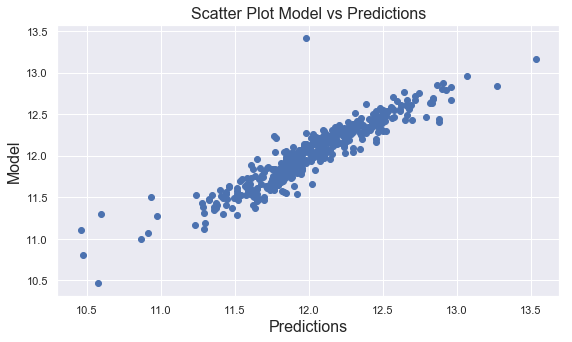

In [545]:
plt.figure(figsize=(9,5))
plt.scatter(y_test,predictions,)
plt.title("Scatter Plot Model vs Predictions", fontsize=16)
plt.xlabel("Predictions", fontsize=16)
plt.ylabel("Model", fontsize=16)
#image1.savefig('Residuals_Test and Original')
# Generated linear fit
# The conclusion of this model is that explain very well, however we have to eliminate the outliers

Text(0.5, 1.0, 'Residuous Distribution')

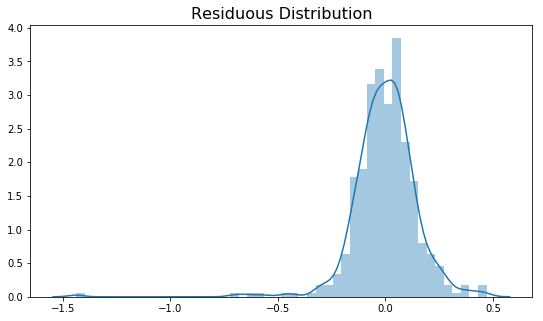

In [91]:
#Now we can check the residuals, which is the difference between the real values of the model vs the predictions
# The result we have are awesome, we have normaly distributed residuals, which means that the model was a correct choice for the data
plt.figure(figsize=(9,5))
sns.distplot((y_test - predictions))
plt.title("Residuous Distribution", fontsize=16)

In [111]:
# Now we are going to use regression evaluation methods
metrics.mean_absolute_error(y_test,predictions)

0.10349944532792987

In [112]:
metrics.mean_squared_error(y_test,predictions)

0.023345810051136853

In [113]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.15279335735278826

Text(0, 0.5, 'Number of Cases')

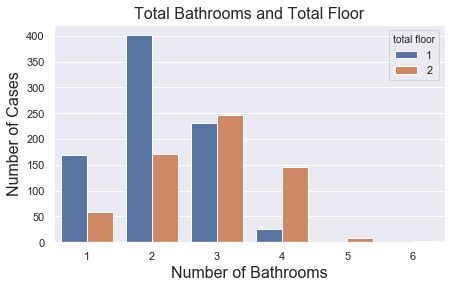

In [548]:
plt.figure(figsize=(7,4))
sns.countplot(x='Total_Bath',hue='total floor', data=train_adj2)
plt.title("Total Bathrooms and Total Floor", fontsize=16)
plt.xlabel("Number of Bathrooms", fontsize=16)
plt.ylabel("Number of Cases", fontsize=16)

Text(0, 0.5, 'Number of Cases')

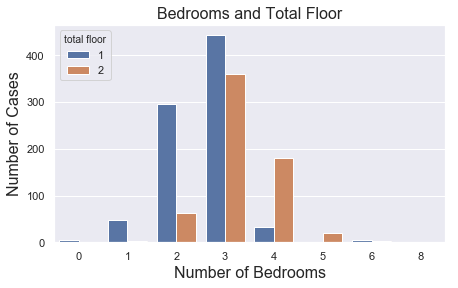

In [547]:
plt.figure(figsize=(7,4))
sns.countplot(x='BedroomAbvGr',hue='total floor', data=train_adj2)
plt.title("Bedrooms and Total Floor", fontsize=16)
plt.xlabel("Number of Bedrooms", fontsize=16)
plt.ylabel("Number of Cases", fontsize=16)

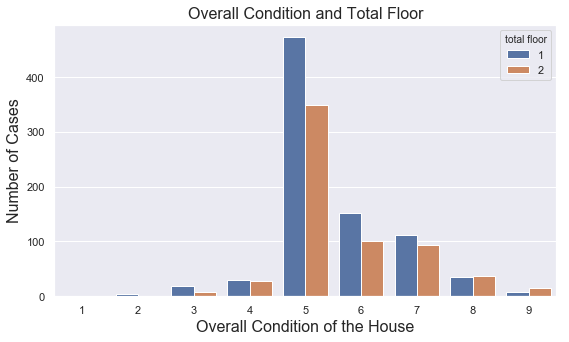

<Figure size 432x288 with 0 Axes>

In [549]:
plt.figure(figsize=(9,5))
sns.countplot(x='OverallCond',hue='total floor', data=train_adj2)
plt.title("Overall Condition and Total Floor", fontsize=16)
plt.xlabel("Overall Condition of the House", fontsize=16)
plt.ylabel("Number of Cases", fontsize=16)
plt.show()
plt.savefig("probando.png") 
#plt.savefig("foo.png", transparent=True)

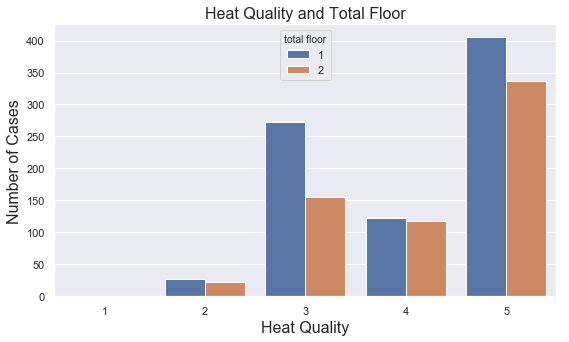

In [550]:
plt.figure(figsize=(9,5))
sns.countplot(x='heat_qual',hue='total floor', data=train_adj2)
plt.title("Heat Quality and Total Floor", fontsize=16)
plt.xlabel("Heat Quality", fontsize=16)
plt.ylabel("Number of Cases", fontsize=16)
plt.show()

Text(0.5, 0, 'House Years')

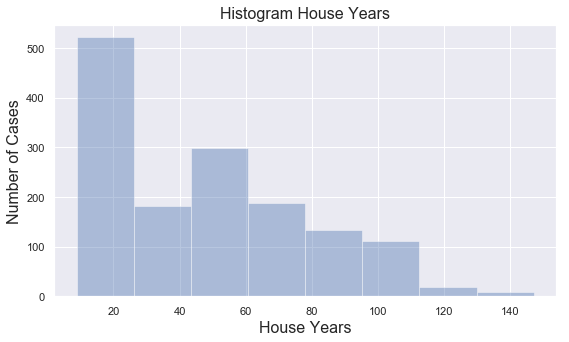

In [551]:
plt.figure(figsize=(9,5))
sns.distplot(train_adj2['YearBuilt_Adj'].dropna(),kde=False,bins=8)
plt.title("Histogram House Years", fontsize=16)
plt.ylabel("Number of Cases", fontsize=16)
plt.xlabel("House Years", fontsize=16)
#f, ax = plt.subplots(figsize=(5,6)) 


([<matplotlib.axis.XTick at 0x2162d0e2438>,
 <a list of 5 Text xticklabel objects>)

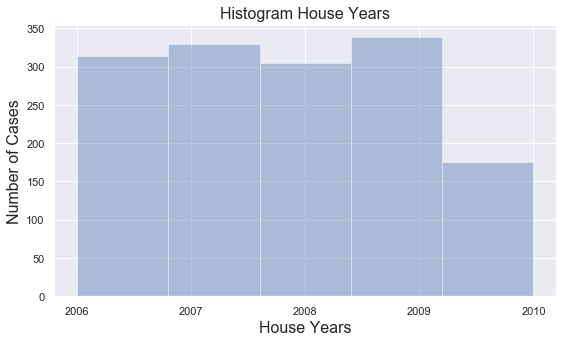

In [536]:
plt.figure(figsize=(9,5))
pd.options.display.float_format = '{:,.0f}'.format
sns.distplot(train1['YrSold'].dropna(),kde=False,bins=5)

plt.title("Histogram House Years", fontsize=16)
plt.ylabel("Number of Cases", fontsize=16)
plt.xlabel("House Years", fontsize=16)
plt.xticks([2006, 2007, 2008, 2009, 2010])

Text(0.5, 0, 'Overall Condition')

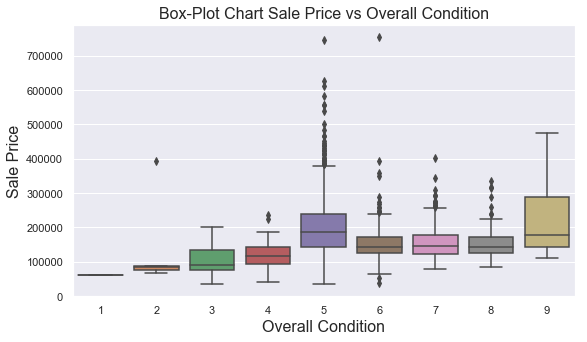

In [535]:
plt.figure(figsize=(9,5))
sns.boxplot(x='OverallCond', y='SalePrice', data=train_adj2)
plt.title("Box-Plot Chart Sale Price vs Overall Condition", fontsize=16)
plt.ylabel("Sale Price", fontsize=16)
plt.xlabel("Overall Condition", fontsize=16)

Text(0.5, 0, 'Total Bedroom')

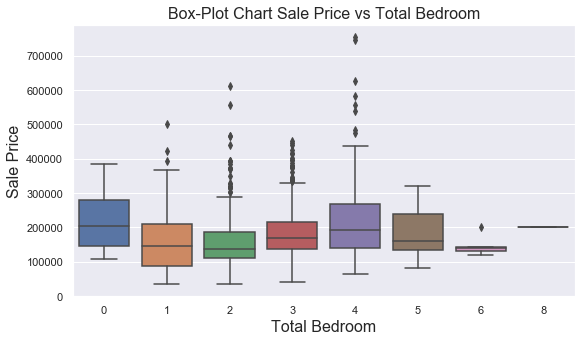

In [534]:
plt.figure(figsize=(9,5))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=train1)
plt.title("Box-Plot Chart Sale Price vs Total Bedroom", fontsize=16)
plt.ylabel("Sale Price", fontsize=16)
plt.xlabel("Total Bedroom", fontsize=16)

Text(0.5, 0, 'Total Bathroom')

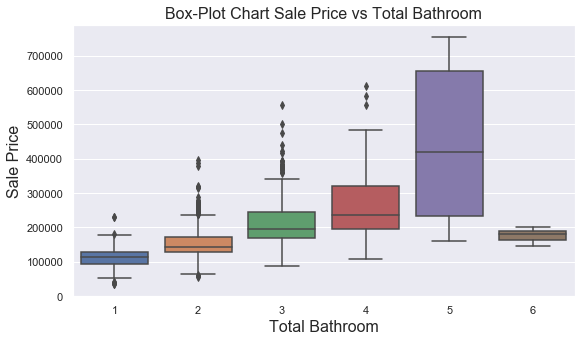

In [541]:
plt.figure(figsize=(9,5))
sns.boxplot(x='Total_Bath', y='SalePrice', data=train_adj1)
plt.title("Box-Plot Chart Sale Price vs Total Bathroom", fontsize=16)
plt.ylabel("Sale Price", fontsize=16)
plt.xlabel("Total Bathroom", fontsize=16)


In [263]:
import pdb

In [266]:
pdb.run('reg.fit(X,Y)')

> <string>(1)<module>()
(Pdb) s
TypeError: fit() missing 1 required positional argument: 'y'
> <string>(1)<module>()
(Pdb) s
--Return--
> <string>(1)<module>()->None
(Pdb) q


In [259]:
??reg.fit

In [263]:
Data Visualization

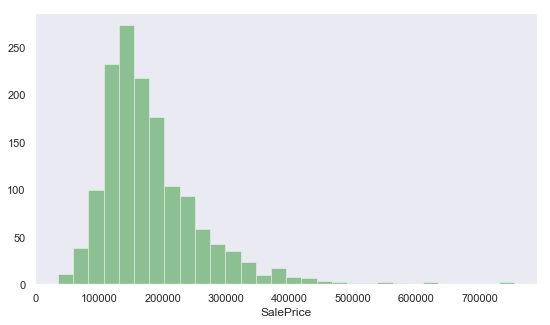

In [477]:
sns.set()
plt.figure(figsize=(9,5))
sns.distplot(train_adj1['SalePrice'].dropna(),kde=False,bins=30, color = 'green')
plt.grid()

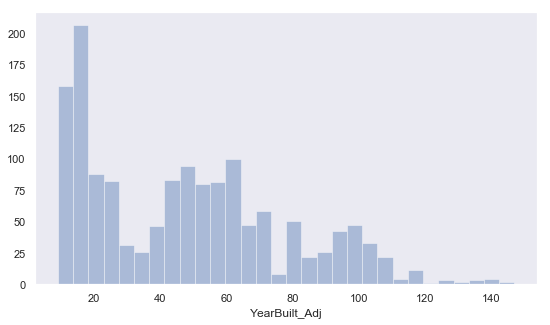

In [467]:
plt.figure(figsize=(9,5))
sns.distplot(train_adj1['YearBuilt_Adj'].dropna(),kde=False,bins=30 )
plt.grid()
#sns.distplot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 648x360 with 0 Axes>

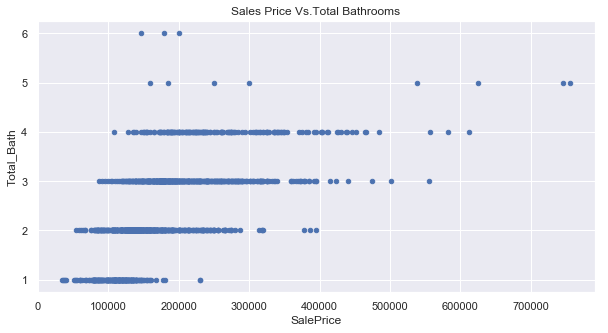

In [468]:
plt.figure(figsize=(9,5))
train_adj2.plot(kind="scatter", x="SalePrice", y="Total_Bath", grid=True, figsize=(10,5),
              title="Sales Price Vs.Total Bathrooms")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


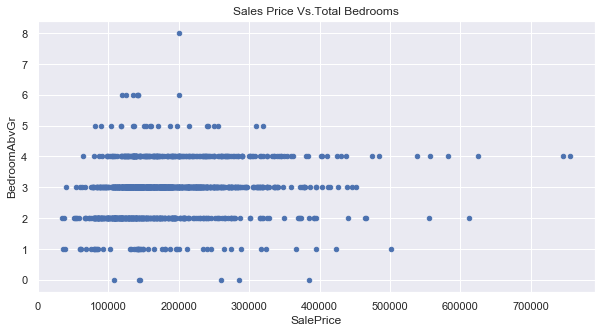

In [290]:
train_adj2.plot(kind="scatter", x="SalePrice", y="BedroomAbvGr", grid=True, figsize=(10,5),
              title="Sales Price Vs.Total Bedrooms")
plt.show()


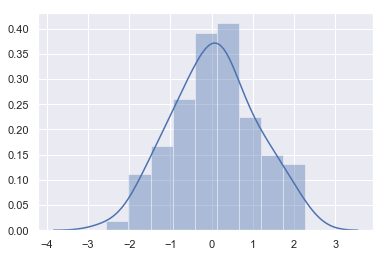

In [2]:
import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

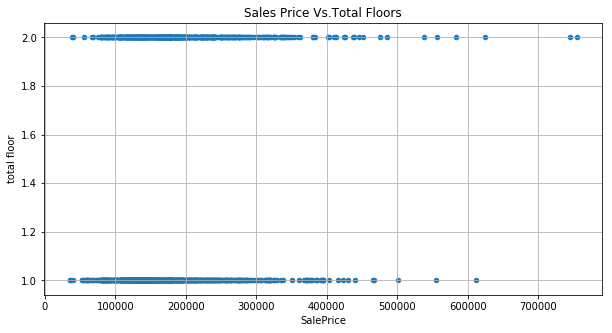

In [86]:
train_adj2.plot(kind="scatter", x="SalePrice", y="total floor", grid=True, figsize=(10,5),
              title="Sales Price Vs.Total Floors")
plt.show()

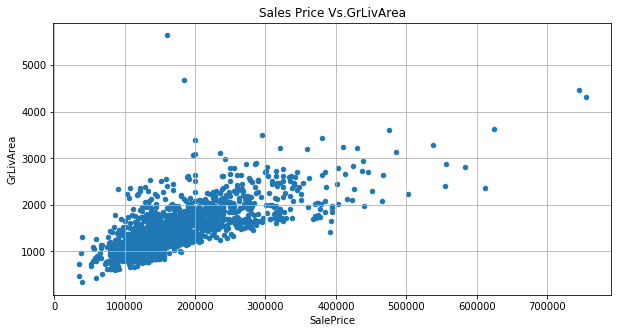

In [88]:
train_adj2.plot(kind="scatter", x="SalePrice", y="GrLivArea", grid=True, figsize=(10,5),
              title="Sales Price Vs.GrLivArea")
plt.show()

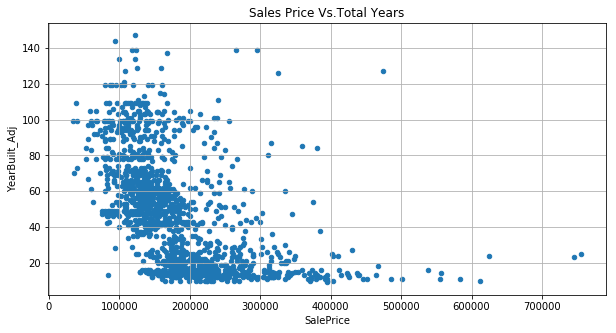

In [89]:
train_adj2.plot(kind="scatter", x="SalePrice", y="YearBuilt_Adj", grid=True, figsize=(10,5),
              title="Sales Price Vs.Total Years")
plt.show()

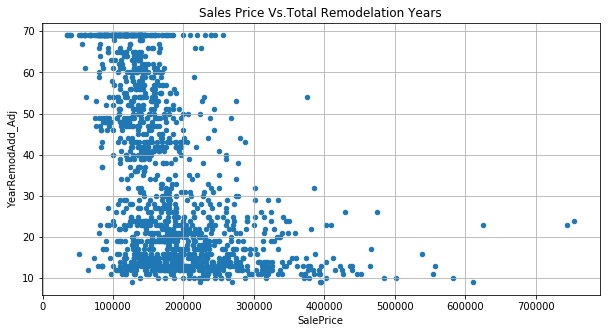

In [90]:
train_adj2.plot(kind="scatter", x="SalePrice", y="YearRemodAdd_Adj", grid=True, figsize=(10,5),
              title="Sales Price Vs.Total Remodelation Years")
plt.show()

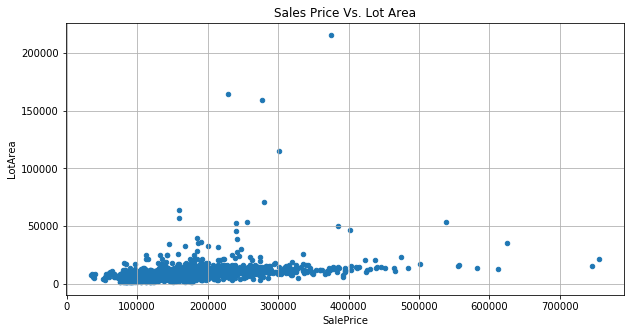

In [179]:
train_adj2.plot(kind="scatter", x="SalePrice", y="LotArea", grid=True, figsize=(10,5),
              title="Sales Price Vs. Lot Area")
plt.show()

In [266]:
regression_dataset.head()

,LN_LotArea,LN_GrLivArea,LN_YearBuilt_Adj,LN_Total_Bath,LN_total floor,OverallQual,OverallCond,2fmCon,Duplex,Twnhs,TwnhsE,FV,RH,RL,RM,GarageCars,kit_qual,heat_qual,g_cond,LN_SalePrice
0,9.041922,7.444249,2.772589,1.386294,0.693147,7,5,0,0,0,0,0,0,1,0,2,4,5,4,12.247694
1,9.169518,7.140453,3.761200,1.098612,0.000000,6,8,0,0,0,0,0,0,1,0,2,3,5,4,12.109011
2,9.328123,7.487734,2.890372,1.386294,0.693147,7,5,0,0,0,0,0,0,1,0,2,4,5,4,12.317167
3,9.164296,7.448334,4.644391,0.693147,0.693147,7,5,0,0,0,0,0,0,1,0,3,4,4,4,11.849398
4,9.565214,7.695303,2.944439,1.386294,0.693147,8,5,0,0,0,0,0,0,1,0,3,4,5,4,12.429216


In [270]:
#pd.options.display.float_format = '${:,.2f}'.format
pd.options.display.float_format = '{:,.0f}'.format
price_per_bed = train_adj2.groupby('BedroomAbvGr').agg({'SalePrice':'mean'})
price_per_bed.round(0)

,SalePrice
BedroomAbvGr,
0,"221,493"
1,"173,162"
2,"158,198"
3,"181,057"
4,"220,421"
5,"180,819"
6,"143,779"
8,"200,000"


In [271]:
pd.options.display.float_format = '{:,.0f}'.format
price_per_bath = train_adj2.groupby('Total_Bath').agg({'SalePrice':'mean'})
price_per_bath.round(0)

,SalePrice
Total_Bath,
1,"110,870"
2,"154,277"
3,"212,191"
4,"263,504"
5,"444,694"
6,"174,967"


In [272]:
pd.options.display.float_format = '{:,.0f}'.format
price_per_car = train_adj2.groupby('GarageCars').agg({'SalePrice':'mean'})
price_per_car

,SalePrice
GarageCars,
0,"103,317"
1,"128,117"
2,"183,852"
3,"309,636"
4,"192,656"


In [273]:
pd.options.display.float_format = '{:,.0f}'.format
price_per_garagequality = train1.groupby('GarageQual').agg({'SalePrice':'mean'})
price_per_garagequality

,SalePrice
GarageQual,
Ex,"241,000"
Fa,"123,573"
Gd,"215,861"
Po,"100,167"
TA,"187,490"


In [305]:
pd.options.display.float_format = '{:,.0f}'.format
price_per_heatquality = train1.groupby('HeatingQC').agg({'SalePrice':'mean'})
price_per_heatquality

,SalePrice
HeatingQC,
Ex,"214,914"
Fa,"123,919"
Gd,"156,859"
Po,"87,000"
TA,"142,363"


In [274]:
pd.options.display.float_format = '{:,.0f}'.format
price_per_kitquality = train1.groupby('KitchenQual').agg({'SalePrice':'mean'})
price_per_kitquality

,SalePrice
KitchenQual,
Ex,"328,555"
Fa,"105,565"
Gd,"212,116"
TA,"139,963"


In [310]:
pd.options.display.float_format = '{:,.0f}'.format
price_per_poolquality = train1.groupby('PoolQC').agg({'SalePrice':'mean'})
price_per_poolquality

,SalePrice
PoolQC,
Ex,490000
Fa,215500
Gd,201990


In [276]:
pd.options.display.float_format = '{:,.0f}'.format
price_per_basemetquality = train1.groupby('BsmtCond').agg({'SalePrice':'mean'})
price_per_basemetquality

,SalePrice
BsmtCond,
Fa,"121,810"
Gd,"213,600"
Po,"64,000"
TA,"183,633"


In [277]:
pd.options.display.float_format = '{:,.0f}'.format
price_per_overallquality = train1.groupby('OverallQual').agg({'SalePrice':'mean'})
price_per_overallquality

,SalePrice
OverallQual,
1,"50,150"
2,"51,770"
3,"87,474"
4,"108,421"
5,"133,523"
6,"161,603"
7,"207,716"
8,"274,736"
9,"367,513"


In [281]:
# Create bins in which to place values 
bins = [9, 15, 30, 45, 60, 75, 90, 105,150]

# Create labels for these bins
group_labels = ['0 to 15', '16 to 30', '31 to 45', '46 to 60', '61 to 75', '76 to 90',
               '91 to 105', '>105']

# Slice the data and place it into bins
train_adj2['Year Built'] = pd.cut(train_adj2['YearBuilt_Adj'], bins, labels=group_labels)

In [282]:
summary_df1 = train_adj2[['Year Built','SalePrice']].pivot_table(index='Year Built', values = 'SalePrice', aggfunc = 'count')
summary_df1.rename(columns={'SalePrice':"Count Sale Price"}, inplace= True)
summary_df1

,Count Sale Price
Year Built,
0 to 15,275
16 to 30,278
31 to 45,166
46 to 60,281
61 to 75,185
76 to 90,93
91 to 105,129
>105,52


In [283]:
summary_df2 = train_adj2[['Year Built','SalePrice']].pivot_table(index='Year Built', values = 'SalePrice', aggfunc = 'mean')
summary_df2.rename(columns={'SalePrice':"Avg Sale Price"}, inplace= True)
summary_df2

,Avg Sale Price
Year Built,
0 to 15,"248,398"
16 to 30,"228,168"
31 to 45,"172,229"
46 to 60,"148,860"
61 to 75,"135,350"
76 to 90,"138,966"
91 to 105,"127,834"
>105,"137,238"


In [284]:
summary_df3 = train_adj2[['Year Built','SalePrice']].pivot_table(index='Year Built', values = 'SalePrice', aggfunc = 'std')
summary_df3.rename(columns={'SalePrice':"Std Sale Price"}, inplace= True)
summary_df3

,Std Sale Price
Year Built,
0 to 15,"88,616"
16 to 30,"80,565"
31 to 45,"48,086"
46 to 60,"43,246"
61 to 75,"37,856"
76 to 90,"62,535"
91 to 105,"43,988"
>105,"70,245"


In [285]:
# creating bin tables:
pd.options.display.float_format = '{:,.0f}'.format
bin_traintable =  pd.concat([summary_df1,summary_df2, summary_df3],axis =1)
bin_traintable.round(0)

,Count Sale Price,Avg Sale Price,Std Sale Price
Year Built,,,
0 to 15,275,"248,398","88,616"
16 to 30,278,"228,168","80,565"
31 to 45,166,"172,229","48,086"
46 to 60,281,"148,860","43,246"
61 to 75,185,"135,350","37,856"
76 to 90,93,"138,966","62,535"
91 to 105,129,"127,834","43,988"
>105,52,"137,238","70,245"


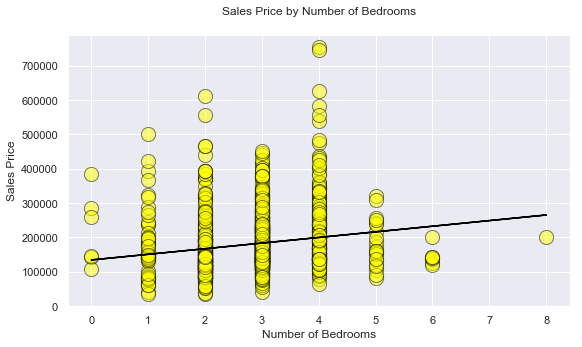

In [469]:
# *Plot Sales Price by Number of Bedrooms 
plt.figure(figsize=(9,5))
number_rooms = train1['BedroomAbvGr']
sales_price = train1['SalePrice']

price_per_bed = pd.DataFrame({'number_rooms': number_rooms, 'sales_price': sales_price})
ax = plt.gca()
price_per_bed.reset_index().plot(kind = 'scatter', x = 'number_rooms', y = 'sales_price', alpha = 0.5,
                                 use_index = True, marker = "o", color = 'yellow', edgecolors = 'black', ax = ax, s = 200)  

# Labels
plt.title('Sales Price by Number of Bedrooms', pad = 20)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sales Price')

# Trendline
x = price_per_bed.reset_index()['number_rooms']
y = price_per_bed['sales_price']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope * x + intercept

plt.plot(x, line, color = 'black')
pd.options.display.float_format = '{:,.0f}'.format

# Create axis
ax = plt.gca()
fig = plt.gcf()

# Show grid
plt.grid(True)
plt.show()

fig.savefig('Sales Price by Number of Bedrooms')

# Analysis:
# From 0 to 4 bedrooms, sales price increases. 
# At 4 bedrooms sales price reaches a plateau and it becomes less valuable to have additional bedrooms.

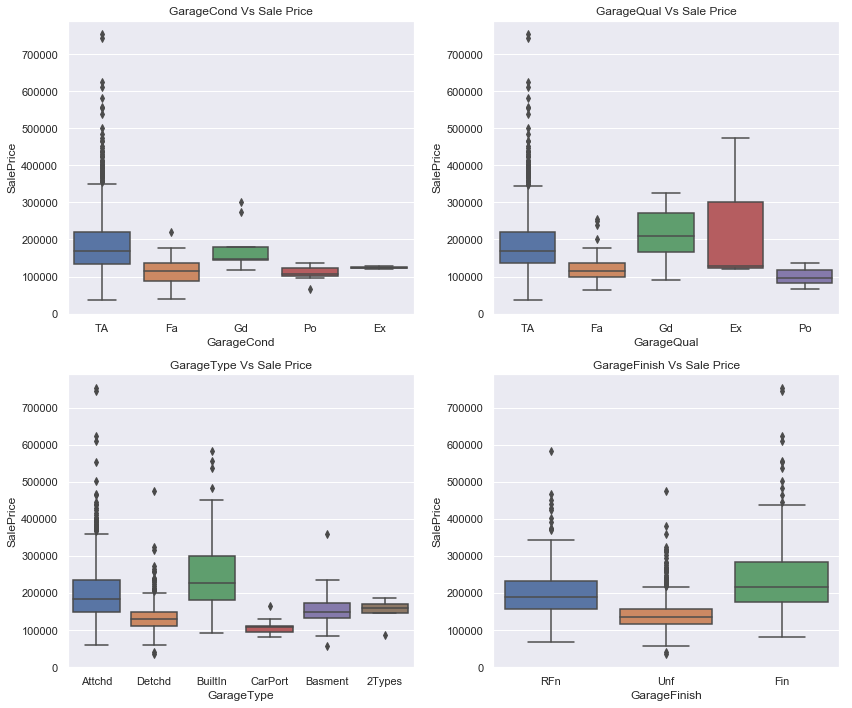

In [287]:
fig, axis = plt.subplots(2,2, figsize = (12,10))
sns.boxplot(data=train1, x = 'GarageCond', y = 'SalePrice', ax=axis[0,0])
axis[0,0].set_title('GarageCond Vs Sale Price' )

sns.boxplot(data=train1, x = 'GarageQual', y = 'SalePrice', ax=axis[0,1])
axis[0,1].set_title('GarageQual Vs Sale Price' )

sns.boxplot(data=train1, x = 'GarageType', y = 'SalePrice', ax=axis[1,0])
axis[1,0].set_title('GarageType Vs Sale Price' )

sns.boxplot(data=train1, x = 'GarageFinish', y = 'SalePrice', ax=axis[1,1])
axis[1,1].set_title('GarageFinish Vs Sale Price')

plt.tight_layout()
fig.savefig('Garage vs Sales Price')

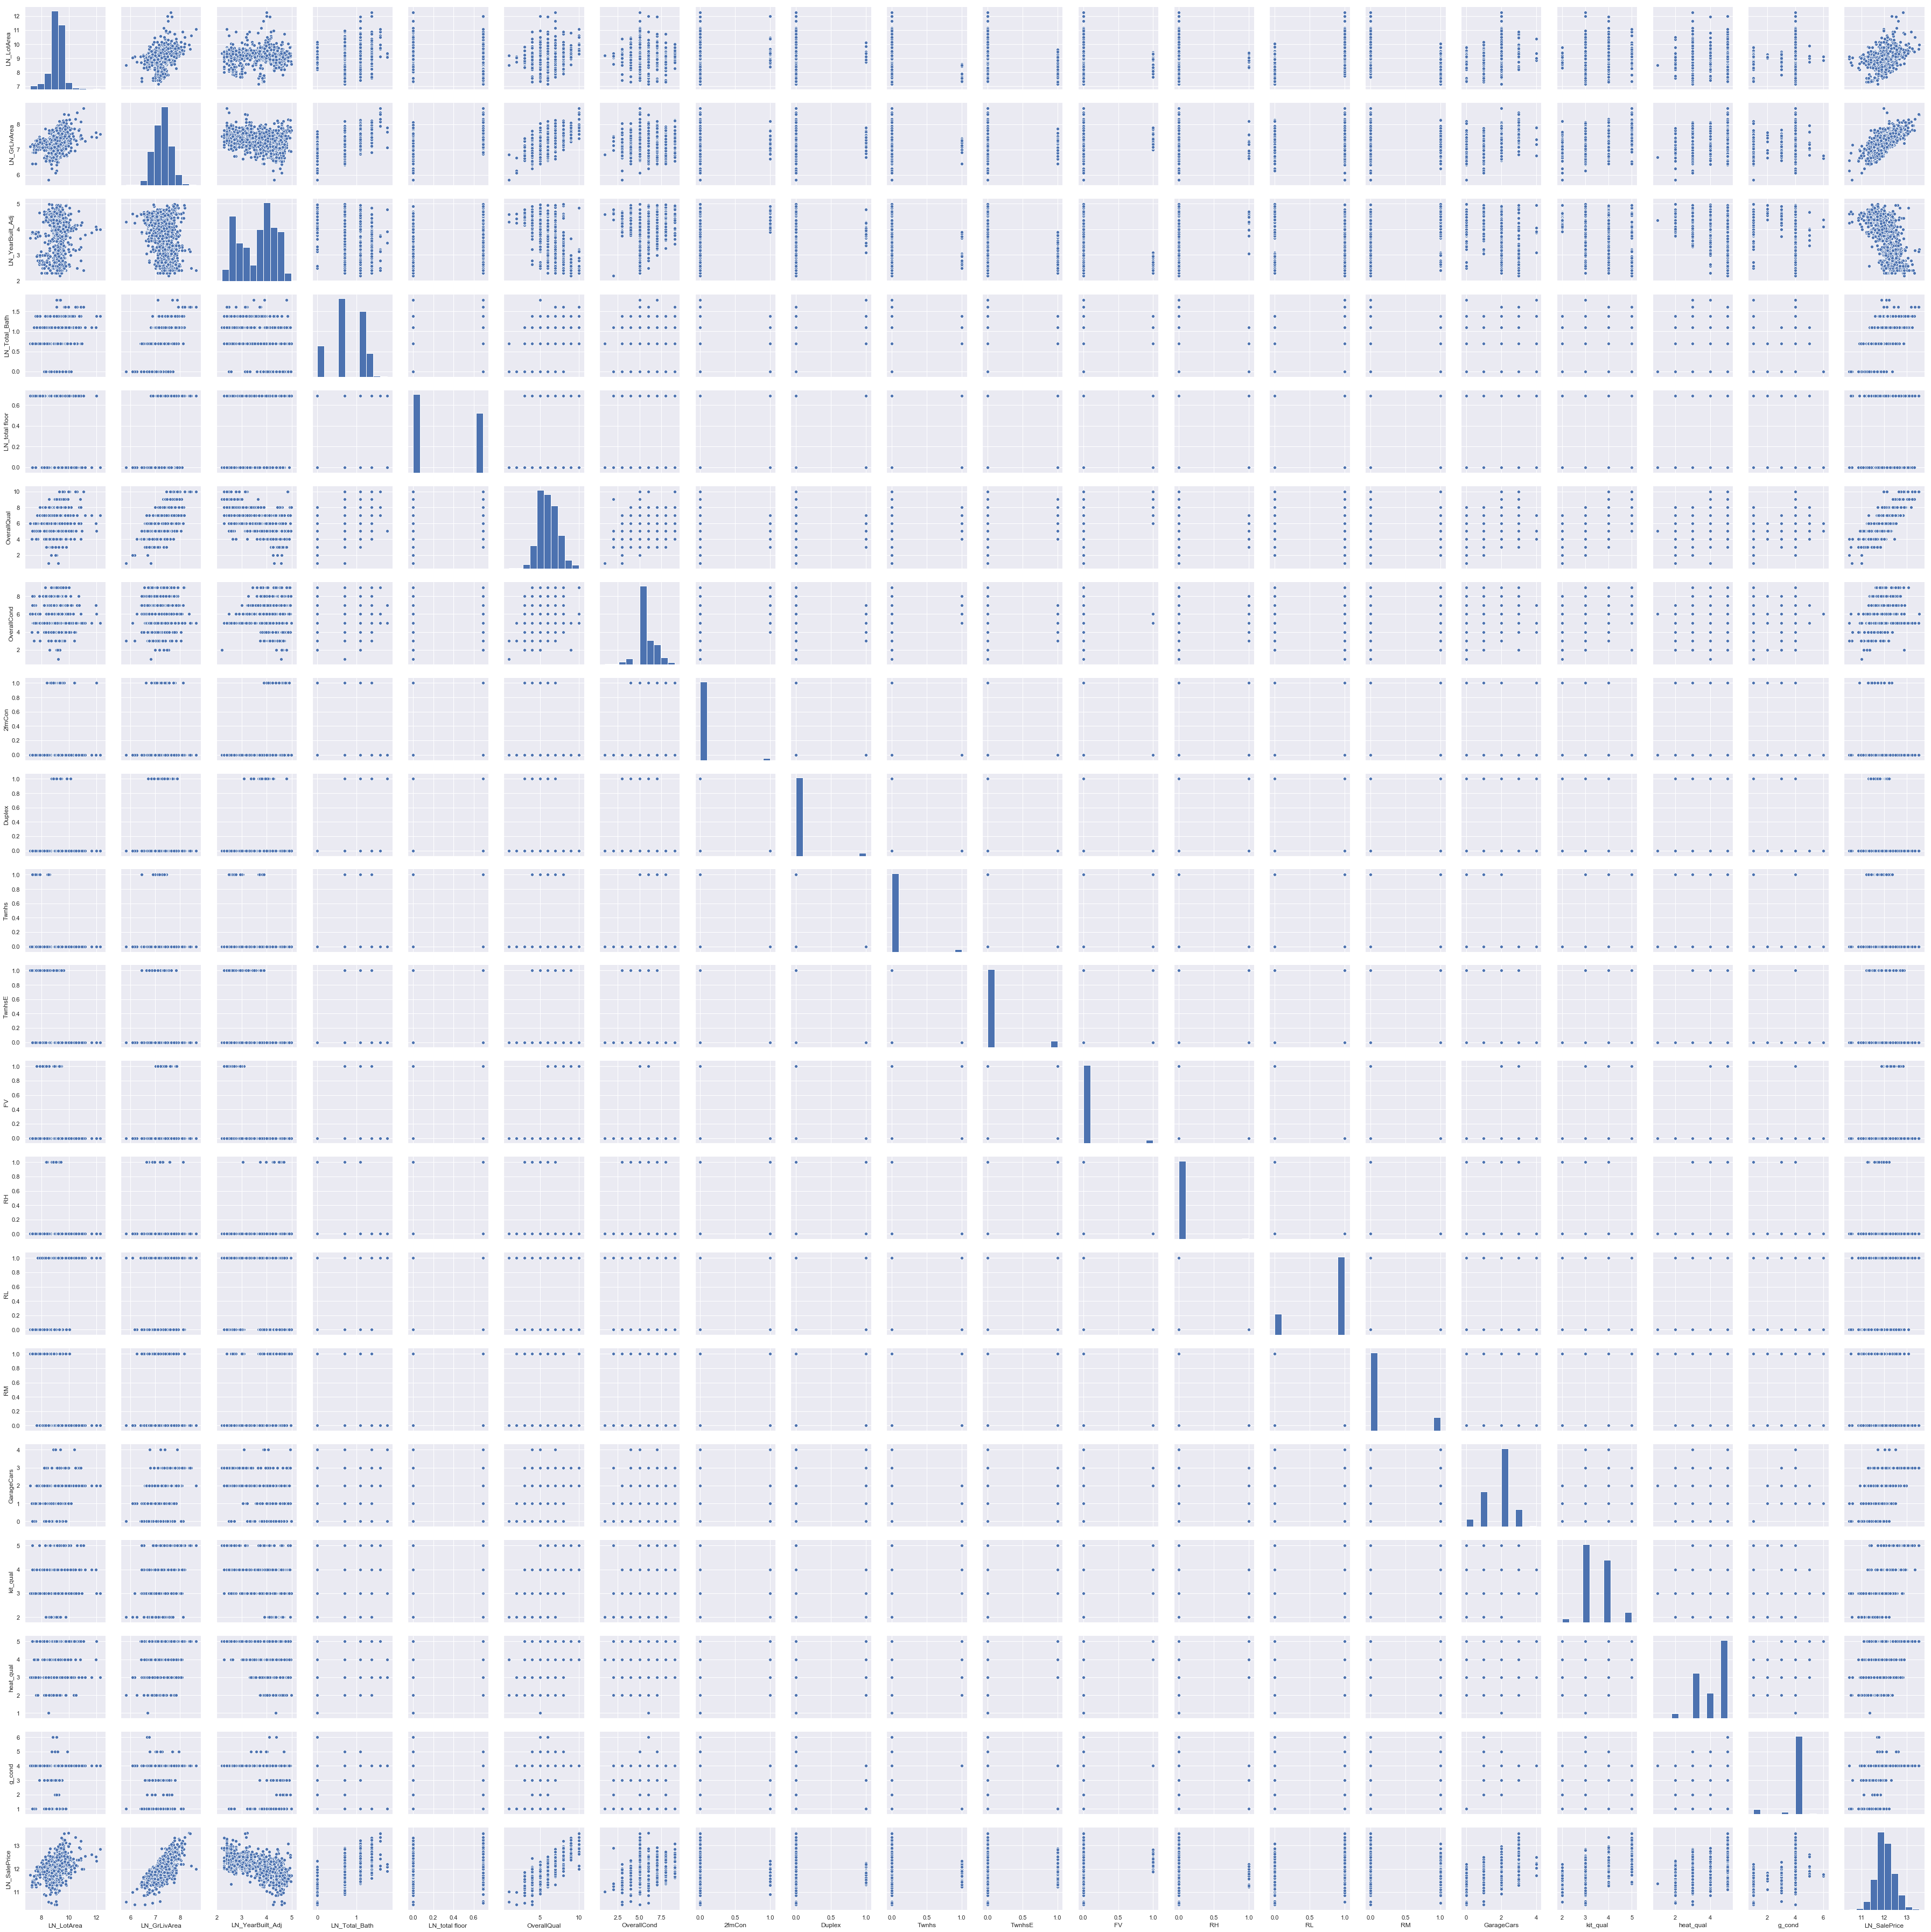

In [321]:
images = sns.pairplot(regression_dataset[''])
images.savefig('charts')


 mu = 47.73 and sigma = 30.19



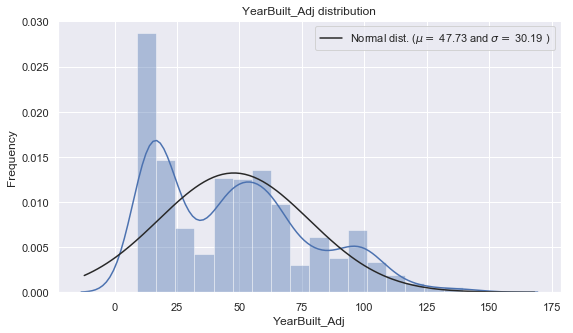

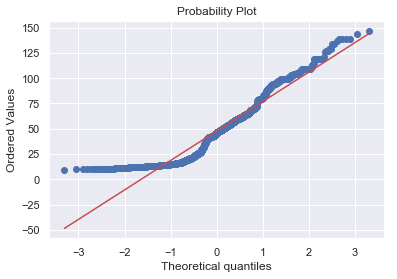

In [470]:
plt.figure(figsize=(9,5))
sns.distplot(train_adj2['YearBuilt_Adj'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_adj2['YearBuilt_Adj'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('YearBuilt_Adj distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_adj2['YearBuilt_Adj'], plot=plt)
plt.show()


 mu = 3.66 and sigma = 0.70



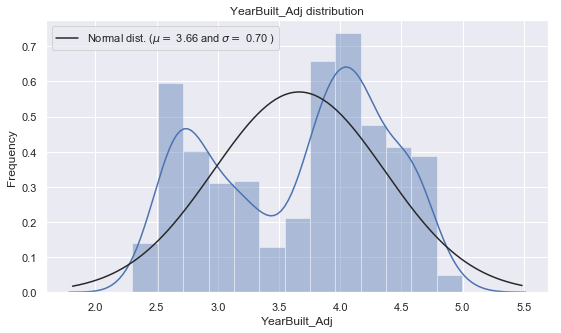

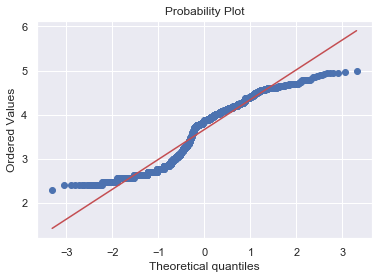

In [471]:
plt.figure(figsize=(9,5))
lnyearadj = np.log1p(train_adj2["YearBuilt_Adj"])

#Check the new distribution 
sns.distplot(lnyearadj , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(lnyearadj)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('YearBuilt_Adj distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(lnyearadj, plot=plt)
plt.show()


 mu = 472.98 and sigma = 213.73



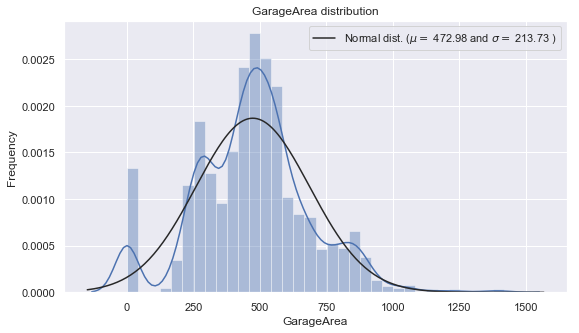

<Figure size 648x360 with 0 Axes>

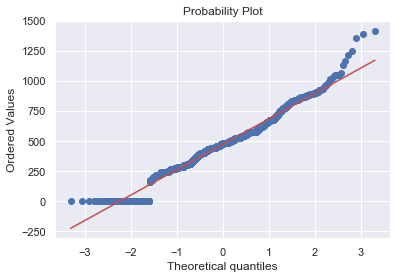

In [473]:
plt.figure(figsize=(9,5))
sns.distplot(train1['GarageArea'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train1['GarageArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GarageArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train1['GarageArea'], plot=plt)
plt.show()


 mu = 5.81 and sigma = 1.45



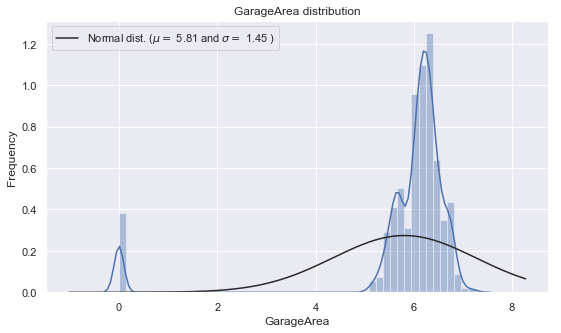

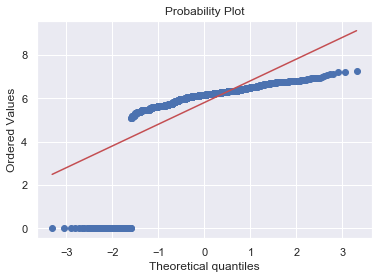

In [474]:
plt.figure(figsize=(9,5))
lngaragear = np.log1p(train1["GarageArea"])

#Check the new distribution 
sns.distplot(lngaragear , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(lngaragear)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GarageArea distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(lngaragear, plot=plt)
plt.show()

In [349]:
regression_dataset.head(1)

,LN_LotArea,LN_GrLivArea,LN_YearBuilt_Adj,LN_Total_Bath,LN_total floor,OverallQual,OverallCond,2fmCon,Duplex,Twnhs,TwnhsE,FV,RH,RL,RM,GarageCars,kit_qual,heat_qual,g_cond,LN_SalePrice
0,9.041922,7.444249,2.772589,1.386294,0.693147,7,5,0,0,0,0,0,0,1,0,2,4,5,4,12.247694


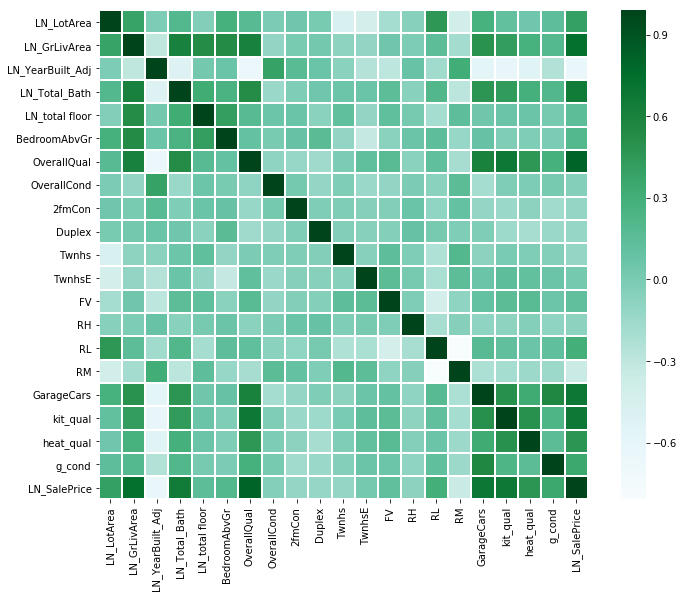

In [124]:
corrmat = regression_dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, cmap='BuGn', linecolor='white',linewidths=1,vmax=0.99, square=True, annot=False)

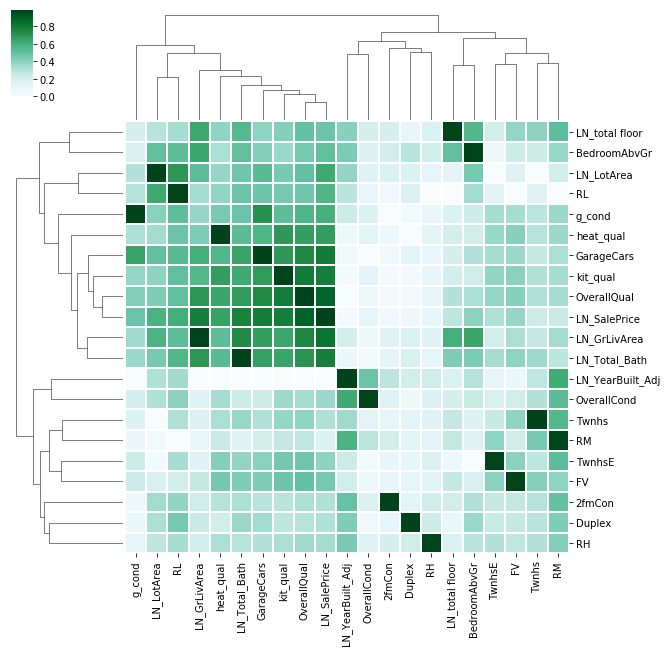

In [125]:
sns.clustermap(corrmat,cmap='BuGn',standard_scale=1 ,linewidths=1,vmax=0.99, linecolor='white', annot=False).savefig('cluster.png')

In [280]:
# To remove NaN in your columns: trainadj.dropna(axis=1, how='all')
# To remove NaN in your rows: trainadj.dropna(axis=0, how='all')